<p align="center"><img src="https://github.com/insaid2018/Term-1/blob/master/Images/INSAID_Full%20Logo.png?raw=true" width="260" height="110" /></p>

---
# **Table of Contents**
---

1. [**Introduction**](#Section1)<br>
2. [**Problem Statement**](#Section2)<br>
3. [**Installing & Importing Libraries**](#Section3)<br>
  3.1 [**Installing Libraries**](#Section31)<br>
  3.2 [**Upgrading Libraries**](#Section32)<br>
  3.3 [**Importing Libraries**](#Section33)<br>
4. [**Data Acquisition & Description**](#Section4)<br>
5. [**Data Pre-Profiling**](#Section5)<br>
6. [**Data Pre-Processing**](#Section6)<br>
7. [**Data Post-Profiling**](#Section7)<br>
8. [**Exploratory Data Analysis**](#Section8)<br>
9. [**Summarization**](#Section9)</br>
  9.1 [**Conclusion**](#Section91)</br>
  9.2 [**Actionable Insights**](#Section91)</br>

---

---
<a name = Section1></a>
# **1. Introduction**
---
 - Reselling Car business is growing due to the high prices of new cars.
 
 - Now a days people are more interested in buying used cars than the new cars.

 - We will be analysing used cars dataset to understand and provide insight of the used car data to help a new start-up to improve their business in US market.


---
<a name = Section2></a>
# **2. Problem Statement**
---
  - Since past few years, prices of new cars have skyrocketed, due to which most people are incapable of buying a new one.

- We have given used cars dataset to understand trend and provide insight from used cars' data to a start-up to increase their sales. Following are the major areas where we will be looking around: 

  - Most selling cars in market.

  - Factors in which price is depend. Specifically we want to undrestand the factors affecting the pricing of cars.

  - Which variable may have significant impact in selling price of car.
  
<p align="center"><img src="https://visme.co/blog/wp-content/uploads/2020/06/animated-interactive-infographics-header-wide.gif"></p>

---
<a id = Section3></a>
# **3. Installing & Importing Libraries**
---

- This section is emphasised on installing and importing the necessary libraries that will be required.

### **Installing Libraries**

In [ ]:
# !pip install -q datascience                                         # Package that is required by pandas profiling
# !pip install -q pandas-profiling                                    # Library to generate basic statistics about data

### **Upgrading Libraries**

- **After upgrading** the libraries, you need to **restart the runtime** to make the libraries in sync.

- Make sure not to execute the cell under Installing Libraries and Upgrading Libraries again after restarting the runtime.

In [ ]:
# !pip install -q --upgrade pandas-profiling                          # Upgrading pandas profiling to the latest version

### **Importing Libraries**



In [ ]:
#-------------------------------------------------------------------------------------------------------------------------------
import pandas as pd                                                 # Importing package pandas (For Panel Data Analysis)
from pandas_profiling import ProfileReport                          # Import Pandas Profiling (To generate Univariate Analysis)
pd.set_option('display.max_columns', None)                          # Unfolding hidden features if the cardinality is high      
pd.set_option('display.max_colwidth', None)                         # Unfolding the max feature width for better clearity      
pd.set_option('display.max_rows', None)                             # Unfolding hidden data points if the cardinality is high
pd.set_option('mode.chained_assignment', None)                      # Removing restriction over chained assignments operations
pd.set_option('display.float_format', lambda x: '%.5f' % x)         # To suppress scientific notation over exponential values
#-------------------------------------------------------------------------------------------------------------------------------
import numpy as np                                                  # Importing package numpys (For Numerical Python)
#-------------------------------------------------------------------------------------------------------------------------------
import matplotlib.pyplot as plt                                     # Importing pyplot interface to use matplotlib
import seaborn as sns                                               # Importing seaborn library for interactive visualization
%matplotlib inline
#-------------------------------------------------------------------------------------------------------------------------------
import scipy as sp                                                  # Importing library for scientific calculations
import warnings                                                     # Importing warning to disable runtime warnings
warnings.filterwarnings("ignore")                                   # Warnings will appear only once
#-------------------------------------------------------------------------------------------------------------------------------

---
<a name = Section4></a>
# **4. Data Acquisition & Description**
---

- The dataset consists of the information about Used Car sales in US.

| Records | Features | Dataset Size |
| :-- | :-- | :-- |
| 9576 | 10 | 748.2 KB | 


|Id|Feature|Description|
|:--|:--|:--|
|01| car           | Car brand name| 
|02| model         | Available car different Variants|  
|03| year          | purchasing Year| 
|04| body          | Body type-Hatchback, Sedan, Crossover etc|   
|05| mileage       | car Mileage|
|06| engV          | Engine version|
|07| engType       | Car Fuel type - Petrol, Diesel, gas etc|
|08| drive         | Wheel Drive Front, back|
|09| registration  | Check if the vechile is registered|
|10| price         | Price of Car in $|


In [ ]:
data = pd.read_csv(filepath_or_buffer = 'https://raw.githubusercontent.com/insaid2018/Term-1/master/Data/Projects/car_sales.csv', encoding='cp1252')
print('Data Shape:', data.shape)
data.head(10)

Data Shape: (9576, 10)


,car,price,body,mileage,engV,engType,registration,year,model,drive
0,Ford,15500.00000,crossover,68,2.50000,Gas,yes,2010,Kuga,full
1,Mercedes-Benz,20500.00000,sedan,173,1.80000,Gas,yes,2011,E-Class,rear
2,Mercedes-Benz,35000.00000,other,135,5.50000,Petrol,yes,2008,CL 550,rear
3,Mercedes-Benz,17800.00000,van,162,1.80000,Diesel,yes,2012,B 180,front
4,Mercedes-Benz,33000.00000,vagon,91,nan,Other,yes,2013,E-Class,NaN
5,Nissan,16600.00000,crossover,83,2.00000,Petrol,yes,2013,X-Trail,full
6,Honda,6500.00000,sedan,199,2.00000,Petrol,yes,2003,Accord,front
7,Renault,10500.00000,vagon,185,1.50000,Diesel,yes,2011,Megane,front
8,Mercedes-Benz,21500.00000,sedan,146,1.80000,Gas,yes,2012,E-Class,rear
9,Mercedes-Benz,22700.00000,sedan,125,2.20000,Diesel,yes,2010,E-Class,rear


### **Data Description**

- In this section we will get **information about the data** and see some observations.

In [ ]:
data.describe()

,price,mileage,engV,year
count,9576.00000,9576.00000,9142.00000,9576.00000
mean,15633.31732,138.86236,2.64634,2006.60599
std,24106.52344,98.62975,5.92770,7.06792
min,0.00000,0.00000,0.10000,1953.00000
25%,4999.00000,70.00000,1.60000,2004.00000
50%,9200.00000,128.00000,2.00000,2008.00000
75%,16700.00000,194.00000,2.50000,2012.00000
max,547800.00000,999.00000,99.99000,2016.00000


### **Observations:**
 
- The **average price** of the car is found to be **15,633**.
- Around **25%** cars have **price** less than or equal to **4,999**.
- Around **50%** cars have **price** less than or equal to **9,200**.
- Around **75%** cars have **price** less than or equal to **16,700**.
- It implies that there are outliers in our data that are impacting the price of cars.

### **Data Information**

- In this section we will see the **information about the types of the features**.

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9576 entries, 0 to 9575
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   car           9576 non-null   object 
 1   price         9576 non-null   float64
 2   body          9576 non-null   object 
 3   mileage       9576 non-null   int64  
 4   engV          9142 non-null   float64
 5   engType       9576 non-null   object 
 6   registration  9576 non-null   object 
 7   year          9576 non-null   int64  
 8   model         9576 non-null   object 
 9   drive         9065 non-null   object 
dtypes: float64(2), int64(2), object(6)
memory usage: 748.2+ KB


### **Observations:**

- The **data types** of all the features look appropriate.

- There are **missing** values present in the **engV** and **Drive** features.

---
<a name = Section5></a>
# **5. Data Pre-Profiling**
---

- For quick analysis pandas profiling is very handy.

- It generates profile reports from pandas DataFrame.

- For each feature **statistics** are preseneted in an interactive HTML report.

In [ ]:
# profile = ProfileReport(df = data)
# profile.to_file(output_file='\.Pre_Profiling_Report.html')
# print('Accomplished!!')

### **Observations:**

- There are **9,576** observations with **10** features. Out of 10 features **5** are **Categorical** **4** are **Numeric** and **1** is **Boolean**.

- **1% (945)** are **Missing Cells**.

- **0.9% (87) Duplicate rows** found.

- **Car, Price, Body** Feature has High Cardinality and High Correlation.

- **2.8% (276)** values are **Zeros** in **Price**. Data for Price seems to be **Right skewed**.

- **38.1% (3,646)** among total cars are **Sedan** followed by **21.6 (2,069)%, Crossover** 

- **Mileage** has high **Correlation** as well as **3.6% (348) Zeros**. Data is **Right Skewed** and majority of the mileage for cars fall under 0 - 200 range. It seems like there are **outliers** in the data.

- **4.5% (434)** values are missing for **engV**. It seems there is **Outlier** in data with **Maximum value as 99.99** which makes data **Right Skewed**.

- **engType** has **High Correlation**. Also, **45.7% (4,379)** cars has **Petrol** variant

- **(94.1%)** cars are **registred**.

- Feature **year** is **Left-Skewed** as it has less than 15 cars with year prior to 1970.

- **5.3% (511)** Missing values in **drive** and **54.2% (5,188)** are **Front** drive.

- **Price and Mileage** is highlighly **correlated** with **year**

---
<a name = Section6></a>
# **6. Data Pre-Processing**
---

- This section is emphasised on performing data manipulation over unstructured data for further processing and analysis.


In [ ]:
data_copy = data.copy()                                  # creating new DF so that original data remain intact
data_copy.drop_duplicates(inplace=True)                  # drop duplicate records from the data

- Replacing Null values for Drive feature

In [ ]:
drive = data_copy[["car", "body", "engType","model","drive"]]     # copy only drive data related data
drive_without_nan = drive[~drive["drive"].isna()]                 # copy data without NaN values

# creating a new unique column "Combined" for each row in both the DFs
drive_without_nan["combined"] = drive_without_nan["car"]+drive_without_nan["body"]+drive_without_nan["engType"]+drive_without_nan["model"]
data_copy["combined"] = data_copy["car"]+data_copy["body"]+data_copy["engType"]+data_copy["model"]


In [ ]:
# Deleting duplicate records from the new data frame
drive_unique_without_nan = drive_without_nan.drop_duplicates()

# Deleting rows those are duplicate basis on combined column
unique_drive_df = drive_unique_without_nan[~drive_unique_without_nan["combined"].duplicated()]

In [ ]:
# creating new column "n_drive" that contains replacement values of NaN in drive column
data_copy["n_drive"] = data_copy["combined"].map(unique_drive_df.set_index("combined")["drive"])
print(data_copy[data_copy.drive.isna()].shape) # check how many NaN row entries are there in the drive column
data_copy[data_copy.drive.isna()].head(5)      # check n_drive values against drive columns

(510, 12)


,car,price,body,mileage,engV,engType,registration,year,model,drive,combined,n_drive
4,Mercedes-Benz,33000.00000,vagon,91,nan,Other,yes,2013,E-Class,NaN,Mercedes-BenzvagonOtherE-Class,NaN
37,Audi,2850.00000,sedan,260,nan,Other,no,1999,A6,NaN,AudisedanOtherA6,front
44,BMW,39333.00000,sedan,6,2.00000,Petrol,yes,2016,520,NaN,BMWsedanPetrol520,rear
52,Mercedes-Benz,31500.00000,sedan,123,2.20000,Diesel,yes,2011,E-Class,NaN,Mercedes-BenzsedanDieselE-Class,rear
103,Volkswagen,10000.00000,van,231,1.90000,Diesel,yes,2005,T5 (Transporter) ïàññ.,NaN,VolkswagenvanDieselT5 (Transporter) ïàññ.,full


In [ ]:
data_copy["drive"].fillna(data_copy["n_drive"], inplace=True)   # replace drive with n_drive
data_copy.dropna(axis=0,subset=["drive"],inplace=True)          # drop Nan values from DF wehre Drive is nan

- Check data for engV > 25 and remove the outliers

In [ ]:
# Check data for engV > 25
print(data_copy[data_copy["engV"] > 25].shape)        # total 36 row values where engV > 25
data_copy[data_copy["engV"] > 25].sort_values(by=["car","engV","engType"], ascending=True).head(5)

(36, 12)


,car,price,body,mileage,engV,engType,registration,year,model,drive,combined,n_drive
184,Audi,4600.00000,vagon,242,99.99000,Diesel,no,2004,A6,front,AudivagonDieselA6,front
1158,Audi,4000.00000,sedan,260,99.99000,Diesel,no,2000,A6,full,AudisedanDieselA6,front
5049,BMW,3300.00000,sedan,233,28.00000,Petrol,no,1997,528,rear,BMWsedanPetrol528,rear
5292,BMW,25000.00000,crossover,150,30.00000,Petrol,yes,2007,X5,full,BMWcrossoverPetrolX5,full
2217,BMW,6800.00000,crossover,242,99.99000,Diesel,no,2005,X3,full,BMWcrossoverDieselX3,full


In [ ]:
engV_median = data["engV"].median()                             # store median value in a variable
data_copy["engV"].fillna(round(engV_median,2), inplace=True)  # fill nan with median value of engV
data_copy1 = data_copy[data_copy["engV"] <= 25]              # drop outliers, copy data for engV > 25 in new var to ensure previous data is intact

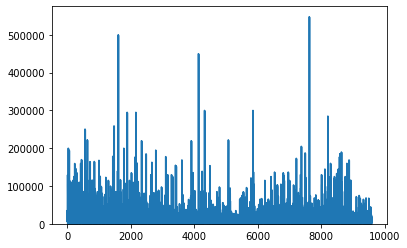

In [ ]:
data_copy1["price"].plot.area()     # create bar graph for price feature

- Remove outliers from the data that might impact the overall price mean as well as the brand price mean
- Change price of car where price = 0 with median.

In [ ]:
data_copy1 = data_copy1[~(data_copy1["price"]> 300000)]      # remove rows price > 300000, total 3 rows which are impacting overall mean and so does the brand mean
data_copy1["price"] = np.where(data_copy1["price"]==0, round(data_copy1.price.median(),2),data_copy1["price"])      # replace price with median where price == 0

- Replace mileage = 0 with median

In [ ]:
mileage_median = data_copy1.mileage.median()
data_copy1["mileage"] = np.where(data_copy1["mileage"]==0, mileage_median, data_copy1["mileage"])

---
<a name = Section7></a>
# **7. Data Post-Profiling**
---

- Now we have cleaned the data, the dataset does not contain missing values.

- Now running pandas post profiling report will give us more beneficial insights.

In [ ]:
# post_profile = ProfileReport(df = data_copy1)
# post_profile.to_file(output_file='Post_Profiling_Report.html')
# print('Accomplished!!')

---
<a name = Section8></a>
# **8. Exploratory Data Analysis**
---
**NOTE:-**

- Before we dive further, we will drop "combined and n_drive" feature which has no more use in analysis.

In [ ]:
df = data_copy1.copy()            # making copy of data so that it remains intact in case required to go back
df.drop(labels=["combined", "n_drive"], axis=1, inplace=True)   # dropping Combined and n_drive columns as these are no more required

## **Question:** 
- Which Brand is sold most in terms of numbers/count?</h4>

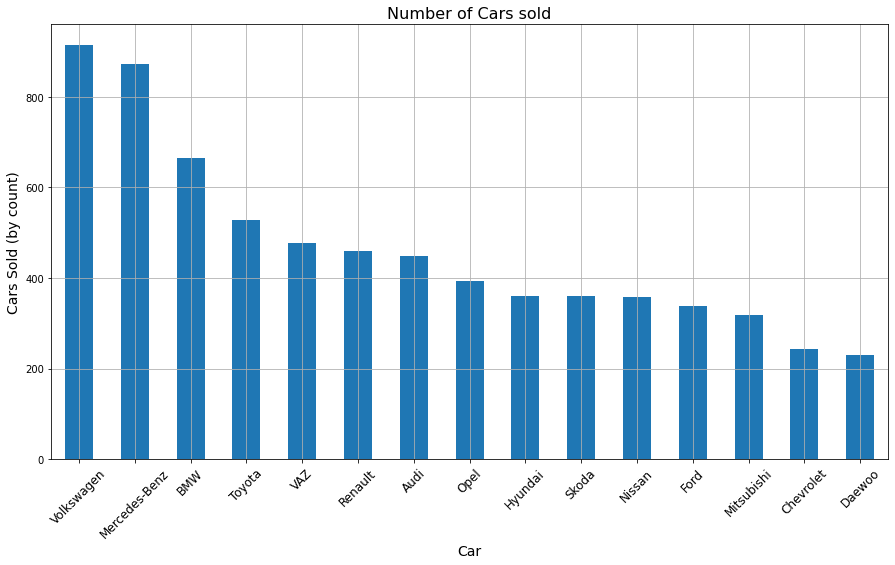

In [ ]:
figure = plt.figure(figsize=[15,8])   # Initialize figure of size 15X7
df["car"].value_counts().head(15).plot.bar()   # using bar function to plot the bar
plt.xticks(rotation=45, size=12)      # changing x-tickets label to 12 and rotate to 90
plt.xlabel(xlabel="Car",size=14)       # Labelling x-axis with a custom label and size
plt.ylabel(ylabel="Cars Sold (by count)", size=14) # Labelling y-axis with custome label and size
plt.title(label="Number of Cars sold", size=16)   # Labelling title
plt.grid(b=True)
plt.show()

**<h4>Observations:**
- Which brand solds most in terms of price?

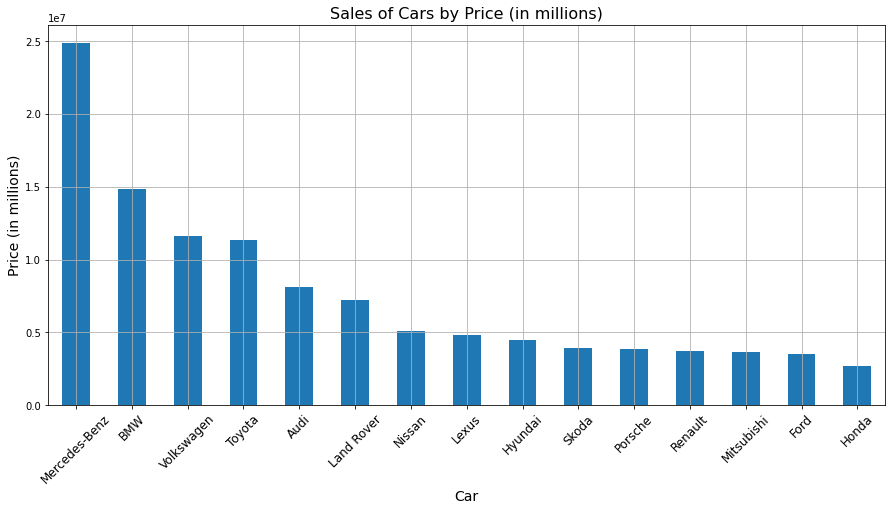

In [ ]:
figure = plt.figure(figsize=[15,7])
df.groupby(by="car")["price"].sum().sort_values(ascending=False).head(15).plot.bar()   # Plot graph for cars sold based on price
plt.xticks(rotation=45, size=12)      # changing x-tickets label to 12 and rotate to 90
plt.xlabel(xlabel = "Car", size=14)     # Labelling x axis
plt.ylabel(ylabel = "Price (in millions)", size=14)     # Labelling y axis
plt.title(label = "Sales of Cars by Price (in millions)", size=16)    # Labelling title
plt.grid(b=True)
plt.show()

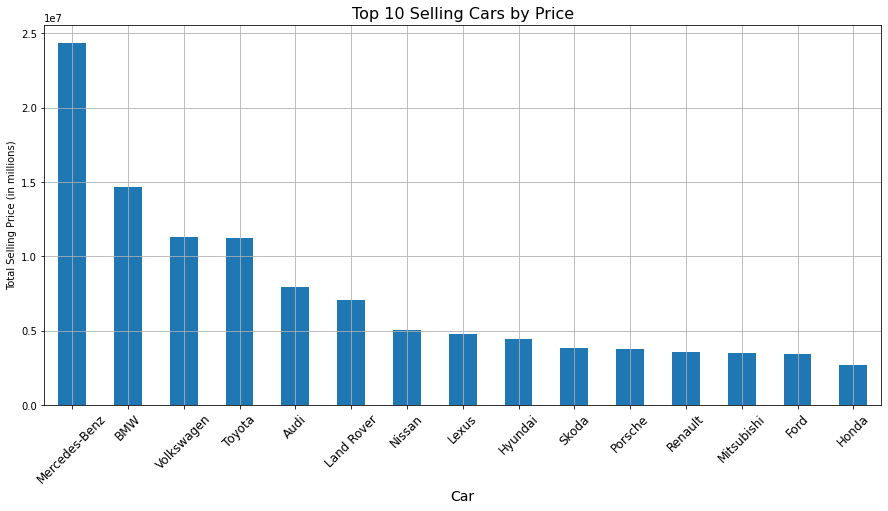

In [ ]:
# check if there is any impact on car price due to the price values 0 replaced with median
figure = plt.figure(figsize=[15,7])
df[df["price"]!= df["price"].median()].groupby(by="car")["price"].sum().sort_values(ascending=False).head(15).plot.bar()  # cars with price != price median
plt.xticks(rotation=45, size=12)      # changing x-tickets label to 12 and rotate to 90
plt.xlabel(xlabel="Car", size=14)     # Labelling x axis
plt.ylabel(ylabel="Total Selling Price (in millions)")        # Labelling y axis
plt.title(label="Top 10 Selling Cars by Price", size=16)       # Labelling title axis
plt.grid(b=True)
plt.show()

**<h4>Observations:** 
- **Volkswagen** is the top **most selling** cars in terms of **Number/Count** followed by Mercedes-Benz, BMW, Toyota and VAZ which holds **37%** weightage of overall sales of cars. **Volkswagen** alone holds **10%** weight from the overall data

- However, **Mercedes** is the most **Selling** car with respect to the **Price** followed by BMW, Volkswagen, Toyota and Audi.

- Which implies **Mercedes, BMW** has more selling price as compare to the **Volkswagen**, even though the Volkswagen holds the highest numbers of selling cars in market.


## **Question:**
- Which feature is highly correlated with price?

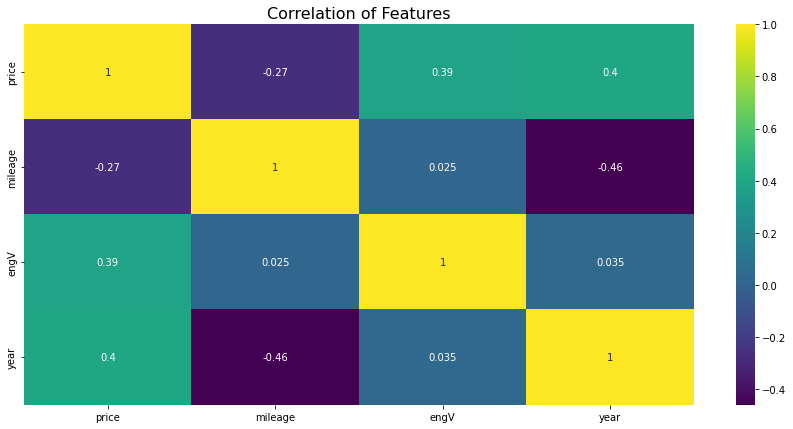

In [ ]:
figure = plt.figure(figsize=[15,7])
sns.heatmap(data=df.corr(), annot=True, cmap="viridis")
plt.title(label="Correlation of Features", size=16)
plt.show()

<Figure size 1080x504 with 0 Axes>

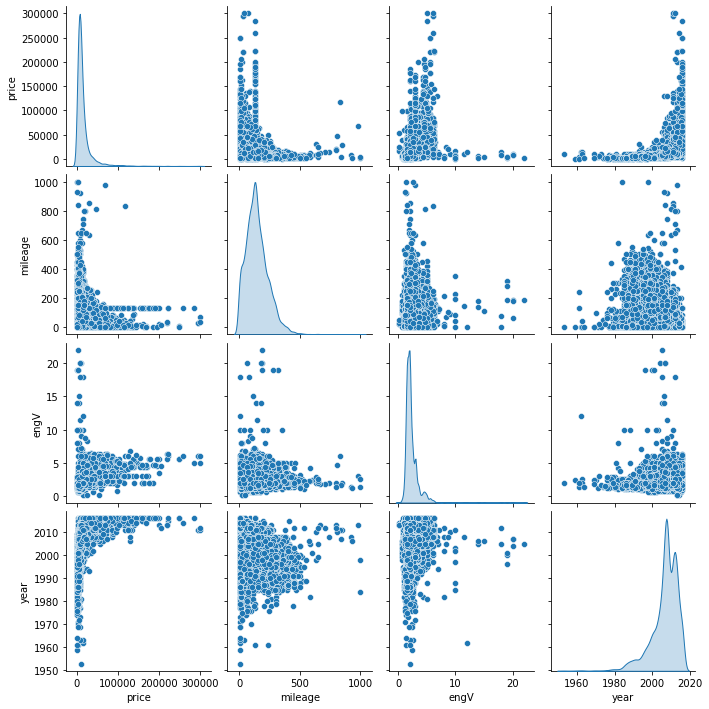

In [ ]:
figure = plt.figure(figsize=[15,7])
subset = df[["price", "mileage", "engV", "year"]]
sns.pairplot(data=subset, size=2.5, diag_kind='kde')
plt.show()

**<h4>Observations:**
- Mileage and price has negative correlation. Hence, if **mileage** is high then the **price** of car would be **low**, wherein if mileage is low then the price of car would be high
- **engV** and **price** has some positive relation that means if engV is high then the price is also increasing however, in some cases if engv is very high then the price is very low. Could be these are the incorrect data for engV
- **year** and **price** also have some positive relation among them which depicts if year is high then the price would be high however, in some of the cases if the year is high then price is low, these could be the **Budget cars**
- **year** and **mileage** has a negative relation

## **Question:**
- Does Body, engType ,Registration, Model and Drive make any impact in sales?

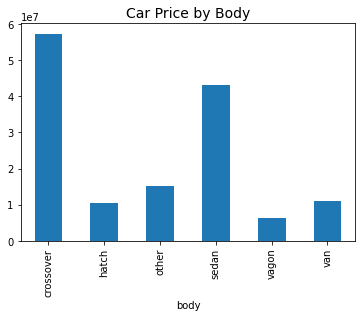

In [ ]:
df.groupby("body")["price"].sum().plot.bar()
plt.title(label="Car Price by Body", size=14)
plt.show()

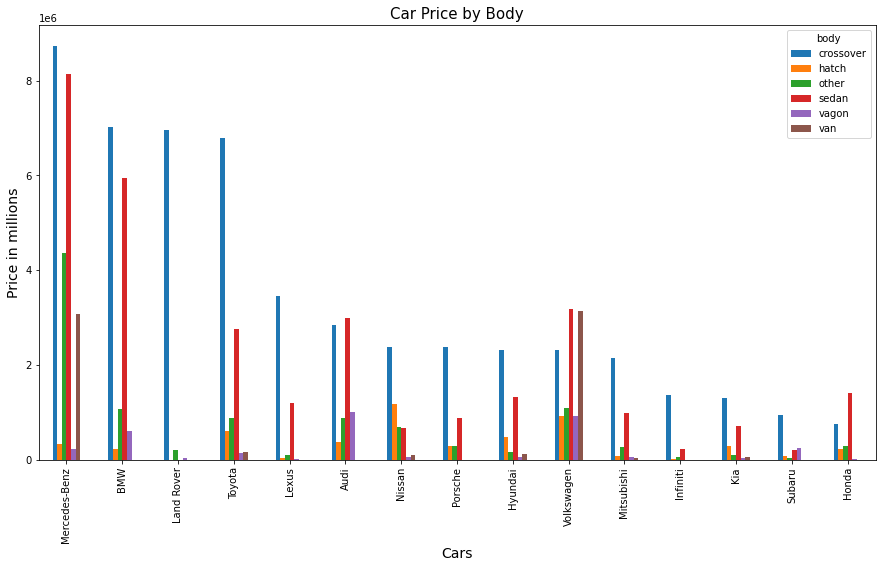

In [ ]:
pd.pivot_table(data=df, values="price", index="car", columns="body", aggfunc='sum').sort_values(by="crossover",ascending=False).head(15).plot.bar(figsize=[15,8])
plt.xlabel(xlabel="Cars", size=14)
plt.ylabel(ylabel="Price in millions", size=14)
plt.title(label="Car Price by Body", size=15)
plt.show()

## **Obervations:**

- **Body** plays pivital role in the price of cars. If body is **crossover** and car has **Luxury** brand then most probably the selling price of car would be high.

In [ ]:
print('Drive details by count:\n', df.groupby("drive")["car"].count().sort_values(ascending=False),'\n')
print('Drive details by price:\n', df.groupby("drive")["price"].sum().sort_values(ascending=False))

Drive details by count:
 drive
front    5392
full     2467
rear     1424
Name: car, dtype: int64 

Drive details by price:
 drive
full    75354101.62680
front   47834070.34645
rear    20105149.11985
Name: price, dtype: float64


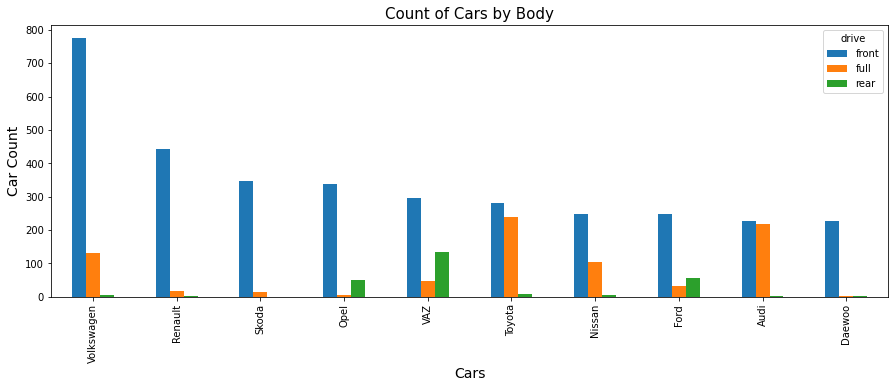

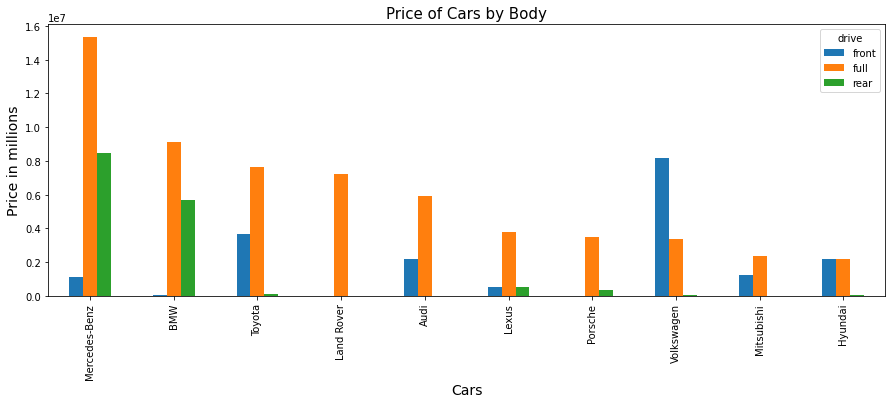

In [ ]:
# Since, front drive cars are more in terms of numbers lets see which brand has more sales of front drive cars
pd.pivot_table(data=df, values="price", index="car", columns="drive", aggfunc='count').sort_values(by="front", ascending=False).head(10).plot.bar(figsize=[15,5])
plt.xlabel(xlabel="Cars", size=14)
plt.ylabel(ylabel="Car Count", size=14)
plt.title(label="Count of Cars by Body", size=15)
plt.show()
# Since, full drive cars are sold in higher price lets see which brand has more sales of full drive cars in terms of their price
pd.pivot_table(data=df, values="price", index="car", columns="drive", aggfunc='sum').sort_values(by="full", ascending=False).head(10).plot.bar(figsize=[15,5])
plt.xlabel(xlabel="Cars", size=14)
plt.ylabel(ylabel="Price in millions", size=14)
plt.title(label="Price of Cars by Body", size=15)
plt.show()

**<h4>Observations:**
- It implies front drive cars are more in terms of selling (count) however, front drive cars are more cheaper than the full drive cars.
- Full drive cars are premium and hence such cars are costly which makes selling price of the cars high

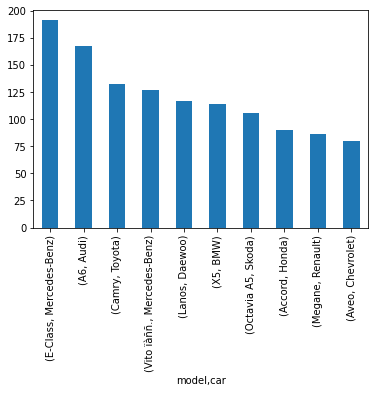

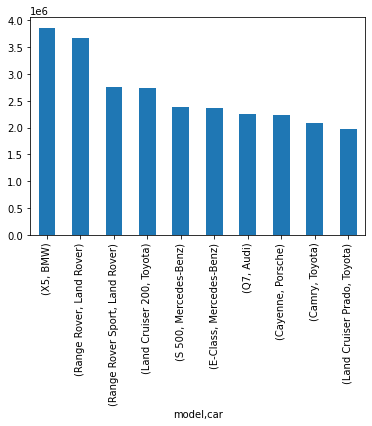

In [ ]:
df[["model","car"]].value_counts().sort_values(ascending=False).head(10).plot.bar()
plt.show()
df.groupby(["model","car"])["price"].sum().sort_values(ascending=False).head(10).plot.bar()
plt.show()

**<h4>Observations:**
- It depicts Luxury brands model are sold most and also have more selling price.

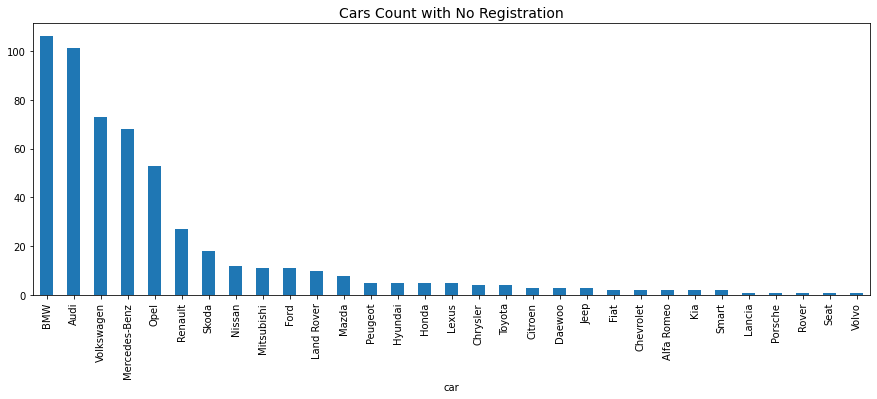

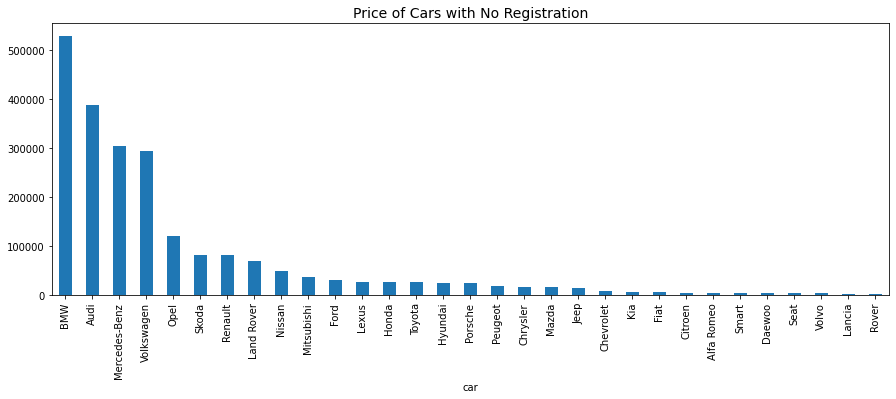

In [ ]:
df[df["registration"]=="no"].groupby(by=["car"])["car"].count().sort_values(ascending=False).plot.bar(figsize=[15,5])
plt.title(label="Cars Count with No Registration", size=14)
plt.show()
df[df["registration"]=="no"].groupby(by=["car"])["price"].sum().sort_values(ascending=False).plot.bar(figsize=[15,5])
plt.title(label="Price of Cars with No Registration",size=14)
plt.show()

**<h4>Observations:** Car Registration as No doens't impact on cars sell. Either registration is Yes or No same brand holds the most count as well as most selling price.

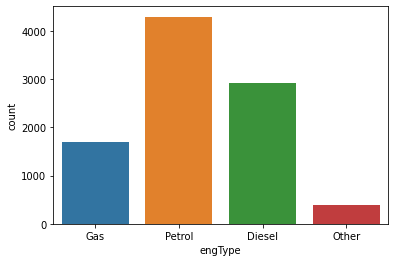

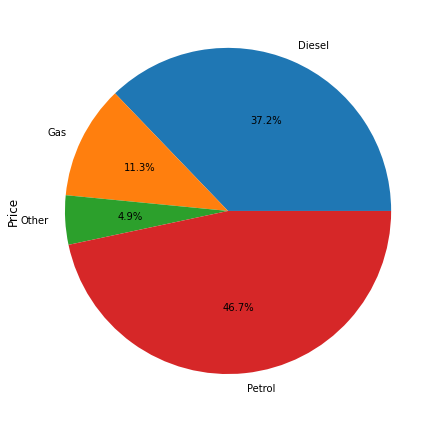

In [ ]:
sns.countplot(x="engType", data=df)
plt.show()
df.groupby(by="engType")["price"].sum().plot.pie(subplots=True, autopct='%1.1f%%', figsize = (15,7.5))
plt.ylabel(ylabel="Price", size=12)
plt.show()

## **Obervations:**

- **Petrol** cars are more followed by **Diesel** and **Gas** cars.

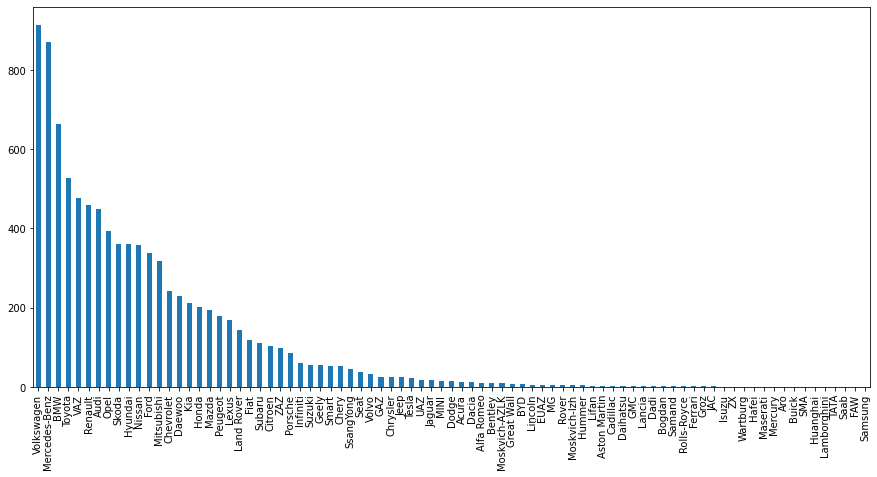

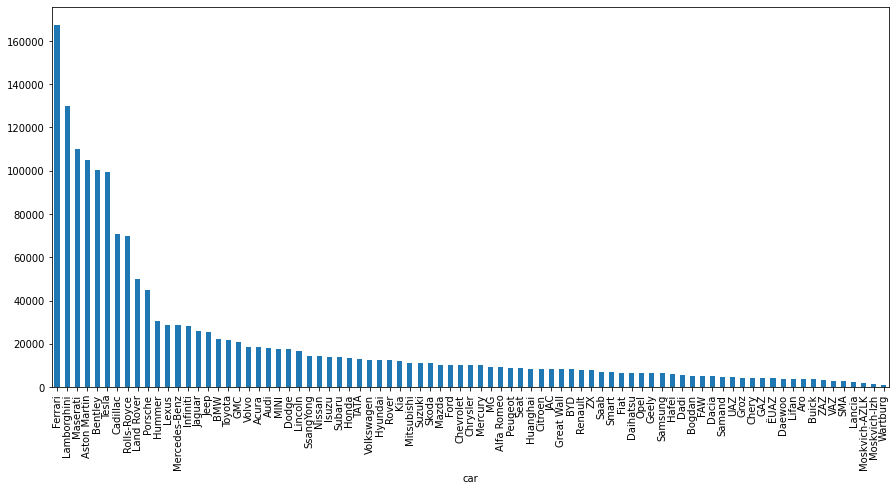

In [ ]:
figure = plt.figure(figsize=[15,7])
df["car"].value_counts().sort_values(ascending=False).plot.bar()
plt.show()
figure = plt.figure(figsize=[15,7])
df.groupby(by="car")["price"].mean().sort_values(ascending=False).plot.bar()
plt.show()

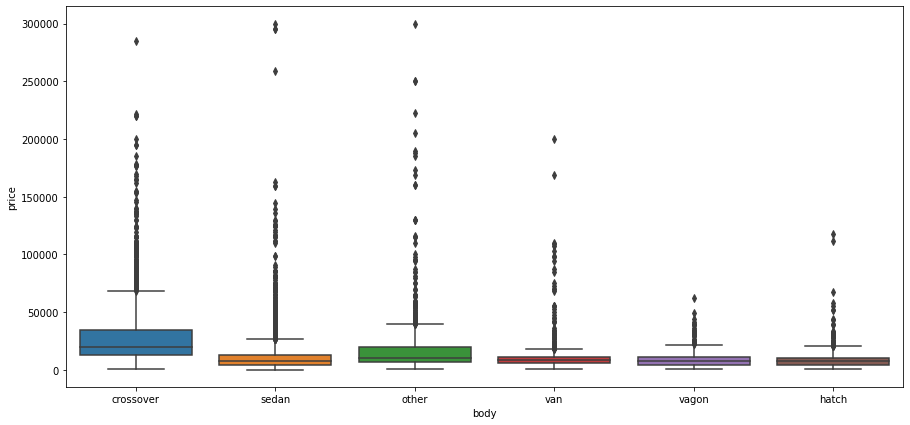

In [ ]:
figure = plt.figure(figsize=[15,7])
sns.boxplot(x = 'body', y = 'price', data = df)
plt.show()

Creating a new feature **Car Category**

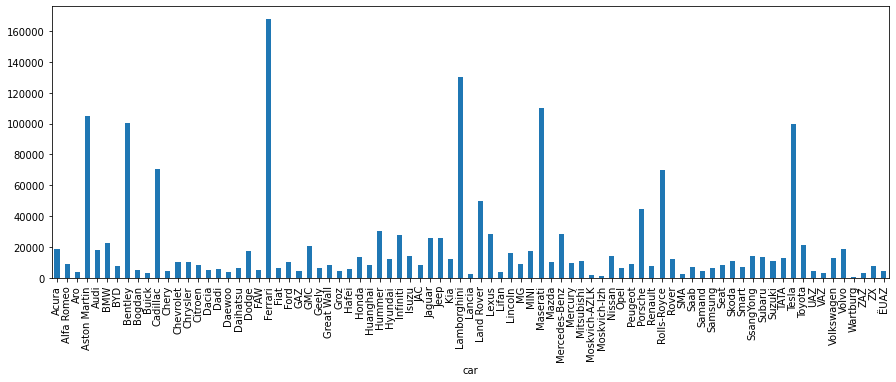

In [ ]:
df_car_avg_price = df[['car','price']].groupby("car", as_index = False).mean().rename(columns={'price':'brand_avg_price'})
df_car_avg_price.plot(x = 'car', kind='bar',legend = False, sort_columns = True, figsize = (15,5))
plt.show()

In [ ]:
df = df.merge(df_car_avg_price, on = 'car')
df['car_category'] = df['price'].apply(lambda x : "Budget" if x < 20000
                                                  else ("Mid_Range" if 20000 <= x < 40000
                                                        else "Luxury"))
# df.drop(columns="brand_avg_price_y", axis=1, inplace=True)
df.head(5)

,car,price,body,mileage,engV,engType,registration,year,model,drive,brand_avg_price,car_category
0,Ford,15500.00000,crossover,68.00000,2.50000,Gas,yes,2010,Kuga,full,10379.16109,Budget
1,Ford,15500.00000,crossover,68.00000,2.50000,Diesel,yes,2010,Kuga,front,10379.16109,Budget
2,Ford,12500.00000,sedan,63.00000,1.60000,Petrol,yes,2013,Focus,front,10379.16109,Budget
3,Ford,12099.00000,sedan,109.00000,1.60000,Gas,yes,2011,Focus,front,10379.16109,Budget
4,Ford,12300.00000,hatch,71.00000,1.60000,Gas,yes,2013,Fiesta,front,10379.16109,Budget


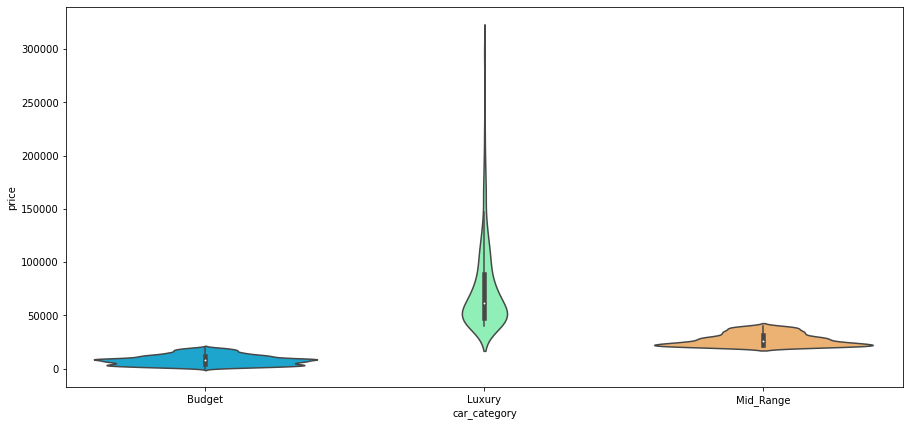

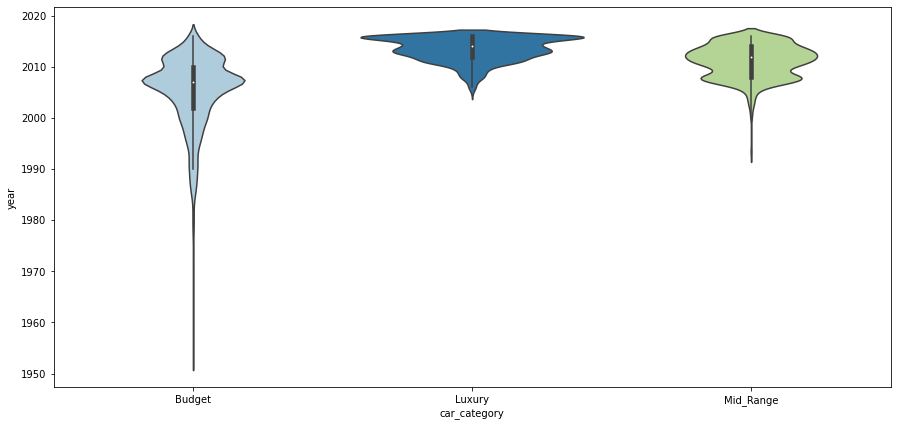

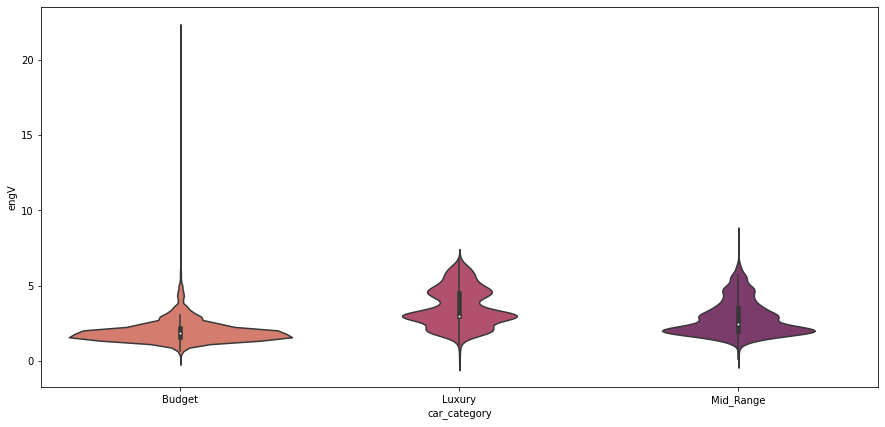

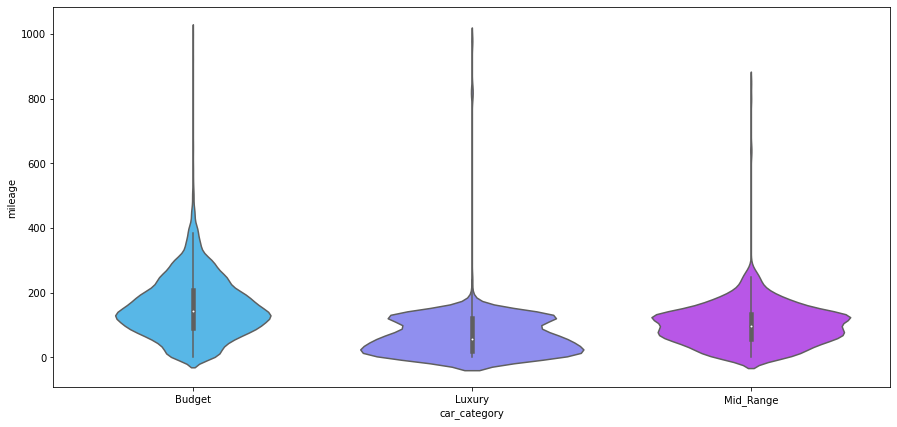

In [ ]:
plt.figure(figsize=(15, 7))
sns.violinplot(x="car_category", y="price", palette="rainbow", data=df)
# sns.scatterplot(x = 'mileage', y = 'price', hue = 'car_category', data = df)
plt.show()
plt.figure(figsize=(15, 7))
# plt.subplot(4,2,2)
sns.violinplot(x="car_category", y="year", palette="Paired", data=df)
# sns.scatterplot(x = 'year', y = 'price', hue = 'car_category', data = df)
plt.show()
plt.figure(figsize=(15, 7))
# plt.subplot(4,2,3)
sns.violinplot(x="car_category", y="engV", palette="flare", data=df)
# sns.scatterplot(x = 'engV', y = 'price', hue = 'car_category', data = df)
plt.show()
plt.figure(figsize=(15, 7))
# plt.subplot(4,2,3)
sns.violinplot(x="car_category", y="mileage", palette="cool", data=df)
# sns.scatterplot(x = 'engV', y = 'price', hue = 'car_category', data = df)
plt.show()

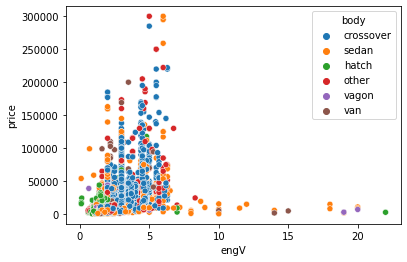

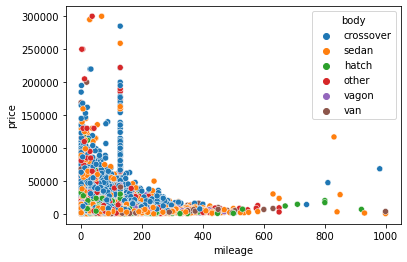

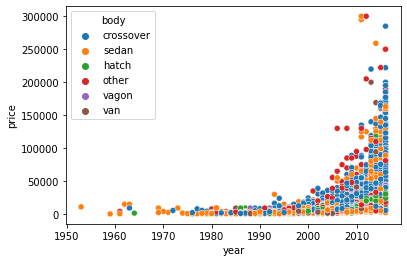

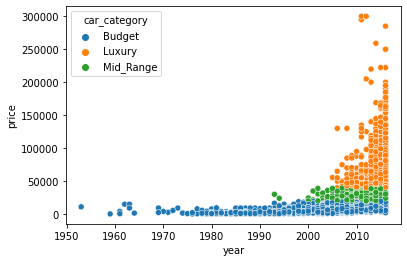

In [ ]:
sns.scatterplot(x = 'engV', y = 'price', hue = 'body', data = df)
plt.show()
sns.scatterplot(x = 'mileage', y = 'price', hue = 'body', data = df)
plt.show()
sns.scatterplot(x = 'year', y = 'price', hue = 'body', data = df)
plt.show()
sns.scatterplot(x = 'year', y = 'price', hue = 'car_category', data = df)
plt.show()

## **Observations:**
- **Price, Mileage, Year, engV and Car Category:**
  - **Budget Cars** - have **high mileage** and **low price**. Cars **Year** < **2000** sold in very low prices. **50%** cars have **engV** = **2**.
  
  - **Mid-Range Cars** - have **low mileage** and **high price**, **50%** cars sold have **Year < 10** and **engV** between **2 - 5**.

  - **Luxury Cars** - are very low in **mileage** and very high in **price**. Cars with recent **Year** sold on very high prices, **50%** cars have **engv > 2.5** and **<=5** 

  


---
<a name = Section9></a>
# **9. Summarization**
---

<a name = Section91></a>
### **9.1 Conclusion**

- The **Used Car** analysis helped us to understand the **trend of used cars** in market and some key major insights about the selling price of cars.

- A total of **9,576** entries were used for analysis along with **10** features. Approx **1%** data had **Missing Cells** along with **1%** **Duplicate** records.

- **Volkswagen** is the top most selling car however, **Mercedes-Benz** and **BMW** has most selling price as compare to **Volkswagen**.

- **Mileage** and **Price** has negative correlation wherein **engV** and **Year** has **positive** relation with **Price**.

- **Crossover** is the most selling **Body** type across any **Car Category** followed by **Sedan** cars.

- **Front** Drive cars are sold most however, these cars are cheaper than the **Full** drive cars. **Full** drive cars are premium and hence such cars have more re-sale price.

- **Price, Mileage, Year, engV and Car Category:**
  - **Budget Cars** - have **high mileage** and **low price**. Cars **Year** < **2000** sold in very low prices. **50%** cars have **engV** = **2**.
  
  - **Mid-Range Cars** - have **low mileage** and **high price**, **50%** cars sold have **Year < 10** and **engV** between **2 - 5**.

  - **Luxury Cars** - are very low in **mileage** and very high in **price**. Cars with recent **Year** sold on very high prices, **50%** cars have **engv > 2.5** and **<=5** 

<a name = Section92></a>
### **9.2 Actionable Insights**

- Our Target audience is more declined towards **Budget** cars.

- Below table represents highlights of our analysis.

| Car Category | Sales (in %) | Selling Price (in %) |
| :-- | :-- | :-- |
| Budget | 81% | 45% | 
| Mid Range | 12% | 21% |
| Luxury | 7% | 34% |